# Quantum Teleportation Protocol in PennyLane

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt



## State Preparation

In [2]:
def state_preparation(state):
    qml.StatePrep(state, wires=[0])

## Arbitrary Unitary Gate


In [3]:
# Define a custom 2x2 unitary matrix (e.g., a rotation around X)
theta = np.pi / 4
U = np.array([[np.cos(theta/2), -1j*np.sin(theta/2)],
              [-1j*np.sin(theta/2), np.cos(theta/2)]])

## Prepare entangled qubits

In [4]:
def entangle_qubits():
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 2])

## Alice operation

In [5]:
def basis_rotation():
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)

## Alice measures and Bob conditionally applies gates

In [6]:
def measure_and_update():
    m0 = qml.measure(0)
    m1 = qml.measure(1)
    qml.cond(m1, qml.PauliX)(2)
    qml.cond(m0, qml.PauliZ)(2)

In [7]:
## Teleportation Potocol Protocol

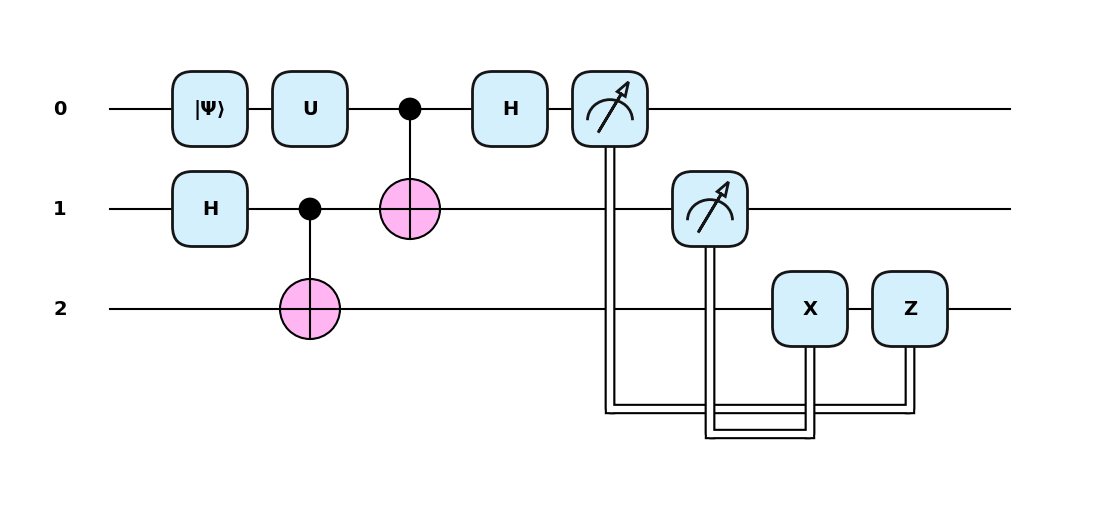

In [8]:
def teleport(state):
    state_preparation(state)
    qml.QubitUnitary(U, wires=0)
    entangle_qubits()
    basis_rotation()
    measure_and_update()


state = np.array([1, 0])
_ = qml.draw_mpl(teleport, style="pennylane")(state)

## Undo state preparation (to make sure we've teleported the correct state)

In [9]:
def state_undo(state):
    qml.adjoint(qml.StatePrep)(state, wires=[2])

In [10]:
dev = qml.device("default.qubit", wires=range(3))

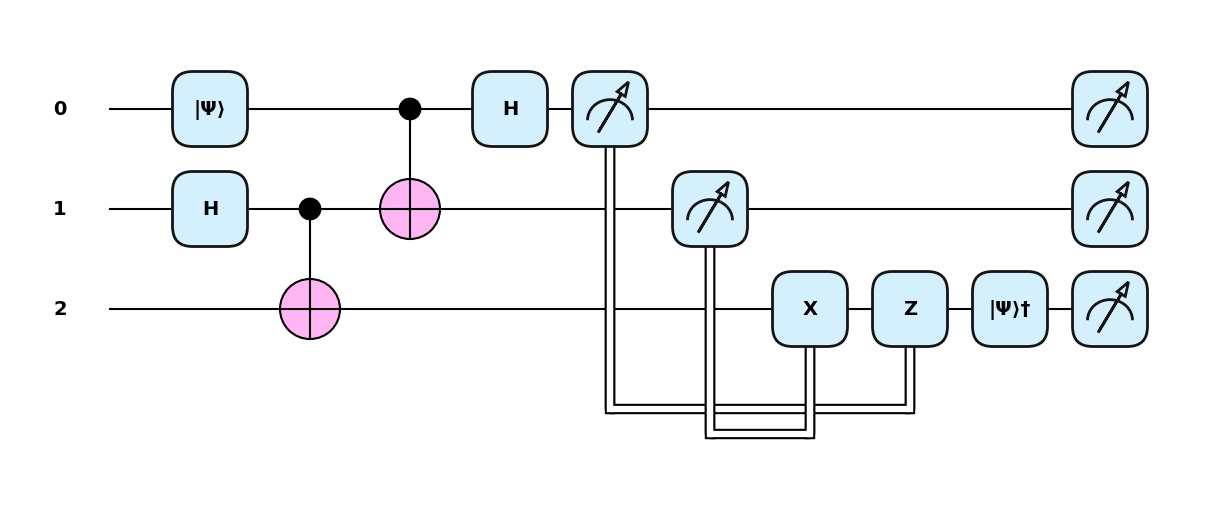

In [11]:
@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    # qml.QubitUnitary(U, wires=0)  
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    # qml.adjoint(qml.QubitUnitary)(U, wires=2)  
    state_undo(state)
    return qml.probs(wires=range(3))

state = np.array([1 , 0])
# state = np.array([0, 1])
# state = np.array([1/np.sqrt(2) ,1/np.sqrt(2)])
# state = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
_ = qml.draw_mpl(teleport, style="pennylane")(state)

In [12]:
probs = teleport(state)

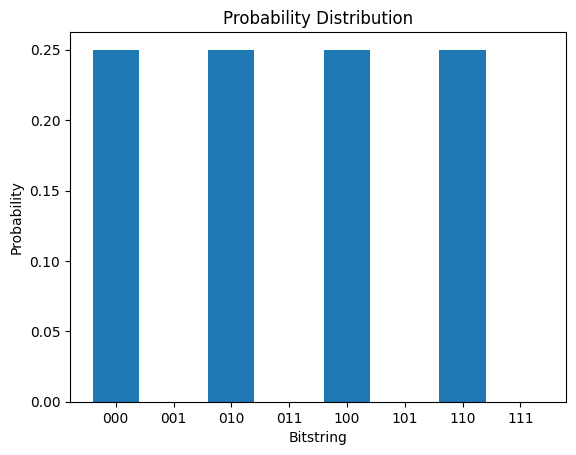

In [13]:
labels = [bin(i)[2:].zfill(3) for i in range(2**3)]  # Convert binary indices to labels
plt.bar(labels, probs)
plt.xlabel("Bitstring")
plt.ylabel("Probability")
plt.title("Probability Distribution")
plt.show()